<a href="https://colab.research.google.com/github/jagvgithub/JJ-Models/blob/main/Propension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODELOS DE CLASIFICACION
---
---
K Neighbors Classifier (knn):
---
Aplicación: Clasificación basada en la similitud con los k vecinos más cercanos.

* Ventajas: Simple y fácil de entender. Funciona bien en datos con estructura simple.
* Desventajas: No es eficiente en conjuntos de datos grandes. Sensible a los valores atípicos.
* Uso en la práctica: Se utiliza comúnmente en problemas de clasificación de pequeña a mediana escala.
* Aplicación: Detección de fraude en transacciones financieras. KNN puede identificar transacciones sospechosas basadas en la similitud con transacciones anteriores.

---
Logistic Regression (lr):
---
* Aplicación: Clasificación binaria y multiclase basada en una función logística.
* Ventajas: Interpretable, fácil de implementar y eficiente en grandes conjuntos de datos.
* Desventajas: Puede ser insuficiente para problemas con relaciones no lineales.
Uso en la práctica: Muy utilizado en la industria y en problemas de clasificación binaria y multiclase.
* Aplicación: Evaluación del riesgo crediticio. Logistic Regression puede predecir la probabilidad de incumplimiento de un préstamo basándose en características financieras y de crédito.
---
Naive Bayes (nb):
---
* Aplicación: Clasificación basada en el teorema de Bayes con la suposición de independencia condicional.
* Ventajas: Eficiente y fácil de implementar. Funciona bien en conjuntos de datos con muchas características.
* Desventajas: La suposición de independencia condicional puede no ser realista en algunos casos.
* Uso en la práctica: Ampliamente utilizado en clasificación de texto y aplicaciones de minería de datos.
* Aplicación: Detección de correo electrónico no deseado (spam) en el correo electrónico de los clientes. Naive Bayes puede clasificar automáticamente los correos electrónicos como spam o no spam basándose en el contenido y las características del correo electrónico.

Aplicación en el Sector Financiero: Detección de Fraude en Transacciones Financieras

Descripción del Problema: En el sector financiero, es fundamental detectar actividades fraudulentas para proteger a los clientes y prevenir pérdidas económicas. Las transacciones financieras fraudulentas pueden incluir cargos no autorizados, uso indebido de tarjetas de crédito o débito, transferencias fraudulentas de fondos, entre otros.
 * Cómo Naive Bayes puede ser utilizado: Naive Bayes es un modelo de clasificación que se basa en el teorema de Bayes y la suposición de independencia condicional entre las características. En el contexto de la detección de fraude en transacciones financieras, Naive Bayes puede ser utilizado para clasificar transacciones como legítimas o fraudulentas en función de diversas características asociadas con la transacción, como el monto, la ubicación, el tipo de transacción, la hora del día, entre otros.

* Ventajas de Naive Bayes en este Contexto:
Eficiencia: Naive Bayes es conocido por su eficiencia computacional, lo que lo hace adecuado para grandes volúmenes de datos de transacciones financieras.
Facilidad de Implementación: Es fácil de implementar y puede proporcionar resultados rápidos, lo que es crucial en la detección de fraude en tiempo real.
Manejo de Datos Desbalanceados: Naive Bayes puede manejar eficazmente conjuntos de datos desbalanceados, que son comunes en la detección de fraude, donde las transacciones legítimas son mucho más frecuentes que las fraudulentas.
* Desventajas y Consideraciones:
Suposición de Independencia Condicional: La suposición de independencia condicional puede no ser realista en todas las situaciones, especialmente en transacciones financieras donde las características pueden estar correlacionadas.
* Sensibilidad a Características Irrelevantes: Naive Bayes puede ser sensible a características irrelevantes o ruido en los datos, lo que puede afectar su precisión.


---
Extra Trees Classifier (et):
---
* Aplicación: Clasificación basada en un conjunto de árboles de decisión aleatorios.
* Ventajas: Menos propenso al sobreajuste que Random Forest. Eficiente en conjuntos de datos grandes.
* Desventajas: Menos interpretable que Decision Trees. Sensible a datos ruidosos y valores atípicos.
* Uso en la práctica: Utilizado en problemas de clasificación donde se busca reducir el sobreajuste.


---
Decision Tree Classifier (dt):
---
* Aplicación: Clasificación basada en la estructura de un árbol de decisiones.
* Ventajas: Interpretable y capaz de capturar relaciones no lineales en los datos.
* Desventajas: Propenso al sobreajuste, especialmente en conjuntos de datos complejos.
* Uso en la práctica: Ampliamente utilizado en problemas de clasificación y como componente en ensambles de modelos.
* Aplicación: Predicción de movimientos del mercado de valores. Random Forest puede analizar una amplia gama de variables financieras para predecir la dirección futura del mercado de valores.
---
Ridge Classifier (ridge):
---
* Aplicación: Clasificación lineal que utiliza regularización de tipo L2 (ridge regression).
* Ventajas: Útil para conjuntos de datos con multicolinealidad y sobreajuste.
* Desventajas: Menos interpretable que Logistic Regression. Sensible a la escala de las características.
* Uso en la práctica: Utilizado en problemas de clasificación donde la regularización es importante, como en la clasificación de texto.
* Aplicación: Detección de anomalías en transacciones financieras. Ridge Classifier puede identificar transacciones inusuales o fraudulentas basadas en patrones de comportamiento anómalos.
---
Random Forest Classifier (rf):
---
* Aplicación: Clasificación basada en un conjunto de árboles de decisión entrenados en subconjuntos aleatorios de los datos.
* Ventajas: Robusto frente al sobreajuste. Capaz de manejar datos categóricos y numéricos.
* Desventajas: Menos interpretable que Decision Trees. Más lento que métodos más simples como Logistic Regression.
* Uso en la práctica: Muy utilizado en problemas de clasificación en una variedad de campos.
---
Ada Boost Classifier (ada):
---
* Aplicación: Clasificación basada en la combinación de múltiples modelos débiles en una única predicción.
* Ventajas: Puede mejorar el rendimiento del modelo base. Menos propenso al sobreajuste.
* Desventajas: Sensible al ruido y valores atípicos. Tiende a ser más lento que modelos individuales.
* Uso en la práctica: Utilizado en problemas de clasificación donde se buscan mejoras en el rendimiento mediante la combinación de modelos.
* Aplicación: Predicción de la demanda de productos financieros. AdaBoost puede combinar múltiples modelos de aprendizaje débiles para predecir la demanda futura de productos financieros como préstamos o seguros.

---
Gradient Boosting Classifier (gbc):
---
* Aplicación: Clasificación basada en el aprendizaje secuencial de árboles de decisión débiles.
* Ventajas: Capaz de capturar relaciones complejas en los datos. Menos propenso al sobreajuste que AdaBoost.
* Desventajas: Sensible a los hiperparámetros y al tiempo de entrenamiento. Puede ser propenso al sobreajuste en conjuntos de datos pequeños.
Uso en la práctica: Muy utilizado en competiciones de aprendizaje automático y problemas de clasificación de alta calidad.
* Aplicación: Detección de transacciones fraudulentas en tiempo real. Gradient Boosting puede combinar múltiples modelos para mejorar la precisión en la detección de actividades fraudulentas en tiempo real.

---
Linear Discriminant Analysis (lda):
---
* Aplicación: Clasificación basada en la combinación lineal de características y el uso de distribuciones de probabilidad.
* Ventajas: Útil cuando las clases están bien separadas y las suposiciones de distribución son razonables.
* Desventajas: No es adecuado para datos con estructura no lineal. Sensible a suposiciones de normalidad y covarianza.
Uso en la práctica: Utilizado en problemas de clasificación con suposiciones razonables sobre la distribución de los datos.
* Aplicación: Clasificación de clientes en categorías de riesgo crediticio. LDA puede identificar diferentes perfiles de riesgo entre los clientes en función de su historial crediticio y financiero.

---
Extreme Gradient Boosting (xgboost):
---
* Aplicación: Clasificación basada en la implementación eficiente de gradient boosting.
* Ventajas: Muy eficiente en términos de velocidad y uso de memoria. Capaz de manejar grandes conjuntos de datos y características.
* Desventajas: Sensible a los hiperparámetros y propenso al sobreajuste en conjuntos de datos pequeños.
Uso en la práctica: Muy utilizado en problemas de clasificación y en la industria de aprendizaje automático en general debido a su eficiencia y rendimiento.
* Aplicación: Predicción de la morosidad de los préstamos. XGBoost puede analizar grandes conjuntos de datos de préstamos para predecir qué clientes son más propensos a incumplir con sus pagos.
* Aplicación: Predicción de la probabilidad de fuga de clientes. XGBoost puede analizar el comportamiento pasado de los clientes y las interacciones con la empresa para predecir la probabilidad de que un cliente cese su relación con la empresa.
---
Light Gradient Boosting Machine (lightgbm):
---
* Aplicación: Clasificación basada en una implementación eficiente de gradient boosting similar a XGBoost.
* Ventajas: Más rápido y más eficiente en el uso de memoria que XGBoost. Capaz de manejar grandes conjuntos de datos y características.
* Desventajas: Sensible a los hiperparámetros y propenso al sobreajuste en conjuntos de datos pequeños.
Uso en la práctica: Cada vez más utilizado en problemas de clasificación, especialmente en entornos donde la eficiencia es una prioridad.
* Aplicación: Predicción de la solvencia de clientes. LightGBM puede evaluar rápidamente la solvencia de los clientes utilizando información financiera y crediticia para tomar decisiones de préstamo.

---
Dummy Classifier (dummy):
---
* Aplicación: Clasificador básico que utiliza una estrategia de predicción simple (por ejemplo, predicción aleatoria o predicción basada en la clase mayoritaria).
* Ventajas: Útil como punto de referencia para comparar el rendimiento de otros modelos más sofisticados.
* Desventajas: No proporciona una predicción útil en la mayoría de los casos.
Uso en la práctica: Principalmente utilizado como una línea base para la evaluación de otros modelos más complejos.
* Aplicación: Clasificación de transacciones financieras para detección de fraude. Un clasificador ficticio puede servir como línea de base para evaluar el rendimiento de otros modelos más complejos en la detección de transacciones fraudulentas.

---
SVM - Linear Kernel (svm):
---
* Aplicación: Clasificación basada en el uso de vectores de soporte para separar las clases linealmente.
* Ventajas: Eficiente en problemas de clasificación linealmente separables. Capaz de manejar alta dimensionalidad.
* Desventajas: Menos efectivo en problemas con grandes conjuntos de datos o relaciones no lineales. Sensible a la elección del kernel.
Uso en la práctica: Utilizado en problemas de clasificación donde se busca una separación lineal de las clases y en problemas de clasificación de alta dimensión.
* Aplicación: Clasificación de transacciones financieras en tiempo real. SVM con un kernel lineal puede clasificar rápidamente transacciones financieras como legítimas o sospechosas basándose en múltiples características.
---
Quadratic Discriminant Analysis (qda):
---
* Aplicación: Clasificación basada en la combinación cuadrática de características y el uso de distribuciones de probabilidad.
* Ventajas: Puede modelar relaciones complejas entre las características. No requiere la suposición de igual covarianza para todas las clases.
* Desventajas: Requiere más datos que LDA debido a un mayor número de parámetros a estimar. Sensible a suposiciones de normalidad y covarianza.
Uso en la práctica: Utilizado en problemas de clasificación con relaciones no lineales entre las características.
* Aplicación: Detección de cambios en las tendencias del mercado. QDA puede identificar cambios significativos en las tendencias del mercado basándose en datos históricos y actuales de precios de acciones y otros activos financieros.




---
Cargue de información que alimentará el modelo que se evaluará posteriormente
---


In [ ]:
# paquetes necesarios
!pip install pycaret

# Librerias necearias
from google.colab import files  # carga de datos
import pandas as pd # manipulación de bases de datos
import numpy as np # manipulación de bases de datos
import gender_guesser.detector as gender # estimación de género a partir del primer y segundo nombre


In [5]:
from google.colab import files
uploaded = files.upload()




Saving ModeloPropension2.xlsx to ModeloPropension2.xlsx


In [ ]:
import pandas as pd

# Ruta al archivo xlsx en Google Colab
ruta_archivo = '/content/ModeloPropension2.xlsx'  # Asegúrate de que la ruta sea correcta según la ubicación del archivo cargado

# Leer el archivo xlsx usando pandas
datos = pd.read_excel(ruta_archivo)
datos=pd.DataFrame(datos)
# Mostrar los primeros 5 registros para verificar que se haya cargado correctamente
print(datos.head())

In [ ]:
 print(datos.dtypes)

In [10]:
datos['DocumentoCliente'] = datos['DocumentoCliente'].apply(lambda x: '{:.0f}'.format(x)).astype(str).str.strip()

In [ ]:
 print(datos.dtypes)

* Función para estimar el género del cliente y así poder incluir esta variable dentro del modelo

In [17]:
import pandas as pd
import gender_guesser.detector as gender

# Función para estimar el género de una lista de nombres
def estimar_genero_por_bloques(nombres):
    detector = gender.Detector()
    generos = [detector.get_gender(nombre) for nombre in nombres]
    return generos

# Tamaño del bloque
tamano_bloque = 1000  # Puedes ajustar este valor según tus necesidades

# Dividir los nombres en bloques y aplicar la función por bloques
for i in range(0, len(datos), tamano_bloque):
    nombres_bloque1 = datos['name1'].iloc[i:i+tamano_bloque]
    nombres_bloque2 = datos['name2'].iloc[i:i+tamano_bloque]
    generos_estimados_bloque1 = estimar_genero_por_bloques(nombres_bloque1)
    generos_estimados_bloque2 = estimar_genero_por_bloques(nombres_bloque2)
    datos.loc[i:i+tamano_bloque-1, 'Genero_estimado_1'] = generos_estimados_bloque1
    datos.loc[i:i+tamano_bloque-1, 'Genero_estimado_2'] = generos_estimados_bloque2


In [22]:
import numpy as np
datos['Genero']=np.where(datos['Genero'].isna(),datos['Genero_estimado_1'],datos['Genero'])
datos['Genero']=np.where(datos['Genero'].isna(),datos['Genero_estimado_2'],datos['Genero'])

def mapear_genero(genero):
    if 'female' in genero:
        return 'Femenino'
    elif genero == 'F':
        return 'Femenino'
    elif pd.isnull(genero):
        return 'NA'
    else:
        return 'Masculino'

# Aplicar la función al DataFrame
datos['Genero'] = datos['Genero'].apply(lambda x: mapear_genero(x))
datos['Genero'].value_counts()


Genero
Masculino    13521
Femenino      6479
Name: count, dtype: int64

In [24]:
datos.drop(columns={'name1','name2','Genero_estimado_1','Genero_estimado_2'})

,DocumentoCliente,MontoIngresos,Egresos,Pasivos,Origen Nacional,Departamento,Municipio,CodigoCIIU,MontoEntradasLarga,CantidadEntradasLarga,...,Retiro en oficina,Reexpedicón TD,Avance TC,repeticiones,Genero,Acierta_Master,Deuda financiera con Finandina,Deuda financiera-TodasObligFinanc,Pqrs,RiesgoCanal
0,1000000479,2459000.0,0.0,0.0,COLOMBIA,BOGOTA,BOGOTA D.C,99,0.000000e+00,0,...,NaN,0,0,0,Masculino,886.0,0.0,4000.0,0,4
1,1000000655,1300000.0,312000.0,0.0,COLOMBIA,BOGOTA,BOGOTA D.C,10,0.000000e+00,0,...,0.0,0,0,0,Masculino,427.0,0.0,0.0,0,4
2,1000000665,800000.0,NaN,NaN,COLOMBIA,BOGOTA,BOGOTA D.C,10,0.000000e+00,0,...,NaN,0,0,0,Masculino,NaN,NaN,NaN,0,4
3,1000001306,1000000.0,5005000.0,5000000.0,COLOMBIA,BOGOTA,BOGOTA D.C,10,0.000000e+00,0,...,NaN,0,0,0,Femenino,413.0,5000000.0,5000000.0,0,4
4,1000001372,1320000.0,NaN,NaN,COLOMBIA,BOGOTA,BOGOTA D.C,10,0.000000e+00,0,...,0.0,0,0,54,Femenino,NaN,NaN,NaN,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1019068543,4500000.0,3640000.0,25937000.0,COLOMBIA,BOGOTA,BOGOTA D.C,99,0.000000e+00,0,...,NaN,0,0,0,Femenino,906.0,0.0,25937000.0,0,2
19996,1019068654,2400000.0,40651000.0,50257000.0,COLOMBIA,BOGOTA,BOGOTA D.C,10,0.000000e+00,0,...,NaN,0,0,0,Masculino,382.0,17046000.0,49817000.0,0,1
19997,1019068714,2470000.0,247000.0,0.0,COLOMBIA,BOGOTA,BOGOTA D.C,10,1.226000e+06,11,...,0.0,0,0,4,Masculino,802.0,0.0,0.0,0,4
19998,1019068731,2150000.0,1781000.0,105495000.0,COLOMBIA,BOGOTA,BOGOTA D.C,10,6.866468e+05,3,...,NaN,0,0,0,Masculino,690.0,0.0,105495000.0,0,1


In [26]:
datos.shape

(20000, 48)

In [27]:
data=datos.sample(frac=0.75,random_state=786).reset_index(drop=True) # entrenamiento
data_unusen =datos.drop(data.index).reset_index(drop=True) # testeo

In [28]:
print(data.shape,data_unusen.shape)

(15000, 48) (5000, 48)


In [29]:
from pycaret.classification import * # la data ya tiene una marcacion de  01

exp_clf101 = setup(data=data,target='Aperturo_2_productos',session_id=10001)  # variable  de interés

,Description,Value
0,Session id,10001
1,Target,Aperturo_2_productos
2,Target type,Binary
3,Original data shape,"(15000, 48)"
4,Transformed data shape,"(15000, 58)"
5,Transformed train set shape,"(10500, 58)"
6,Transformed test set shape,"(4500, 58)"
7,Numeric features,37
8,Categorical features,10
9,Rows with missing values,94.0%


In [30]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6803,0.0000,0.5792,0.6352,0.6057,0.3378,0.3390,0.6360
lr,Logistic Regression,0.6309,0.7005,0.3452,0.6148,0.4418,0.1978,0.2161,1.4190
nb,Naive Bayes,0.6037,0.0000,0.1718,0.6199,0.2686,0.1034,0.1439,0.3970
et,Extra Trees Classifier,0.5893,0.0000,0.0357,0.9153,0.0676,0.0374,0.1198,0.8430
dt,Decision Tree Classifier,0.5759,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4290
ridge,Ridge Classifier,0.5759,0.7443,0.0000,0.0000,0.0000,0.0000,0.0000,0.3860
rf,Random Forest Classifier,0.5759,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.3620
ada,Ada Boost Classifier,0.5759,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3800
gbc,Gradient Boosting Classifier,0.5759,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.6520
lda,Linear Discriminant Analysis,0.5759,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5550


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [31]:
modelo = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6724,0.0000,0.5516,0.6308,0.5885,0.3184,0.3204
1,0.6657,0.0000,0.5471,0.6209,0.5816,0.3051,0.3068
2,0.6686,0.0000,0.5942,0.6134,0.6036,0.3190,0.3191
3,0.6743,0.0000,0.5640,0.6291,0.5948,0.3238,0.3252
4,0.7038,0.0000,0.6045,0.6658,0.6337,0.3861,0.3873
5,0.6771,0.0000,0.5596,0.6352,0.5950,0.3284,0.3302
6,0.6610,0.0000,0.5798,0.6042,0.5917,0.3021,0.3022
7,0.6848,0.0000,0.5978,0.6364,0.6165,0.3493,0.3498
8,0.7029,0.0000,0.6202,0.6587,0.6389,0.3868,0.3874


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [32]:
print(modelo)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [33]:
tuned_modelo = tune_model(modelo)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6876,0.0000,0.5561,0.6561,0.6019,0.3478,0.3510
1,0.7076,0.0000,0.5919,0.6787,0.6323,0.3915,0.3940
2,0.6933,0.0000,0.5919,0.6535,0.6212,0.3646,0.3659
3,0.7133,0.0000,0.5888,0.6895,0.6352,0.4015,0.4049
4,0.7010,0.0000,0.5528,0.6814,0.6104,0.3720,0.3774
5,0.7210,0.0000,0.6315,0.6854,0.6573,0.4226,0.4236
6,0.6971,0.0000,0.6090,0.6530,0.6302,0.3743,0.3750
7,0.6905,0.0000,0.5708,0.6546,0.6098,0.3553,0.3576
8,0.6876,0.0000,0.5685,0.6504,0.6067,0.3496,0.3517


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [35]:
print(tuned_modelo)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=35, p=2,
                     weights='uniform')


In [46]:
help(plot_model) # validacion visual

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

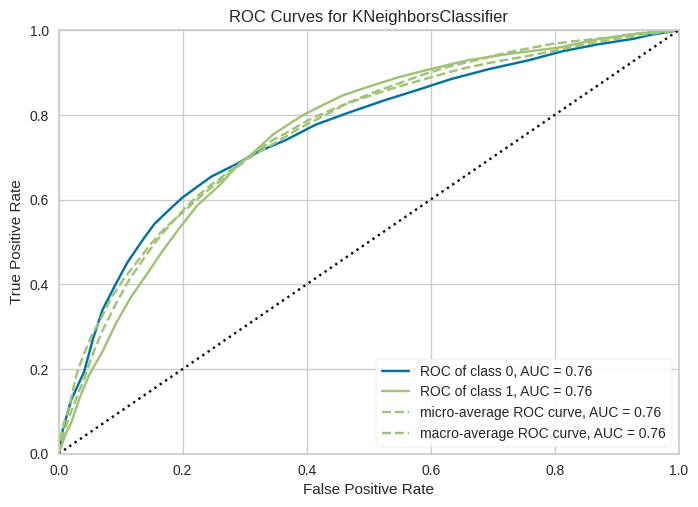

In [37]:
plot_model(tuned_modelo,plot='auc')

In [ ]:
# feature importance
plot_model(tuned_modelo,plot='feature')

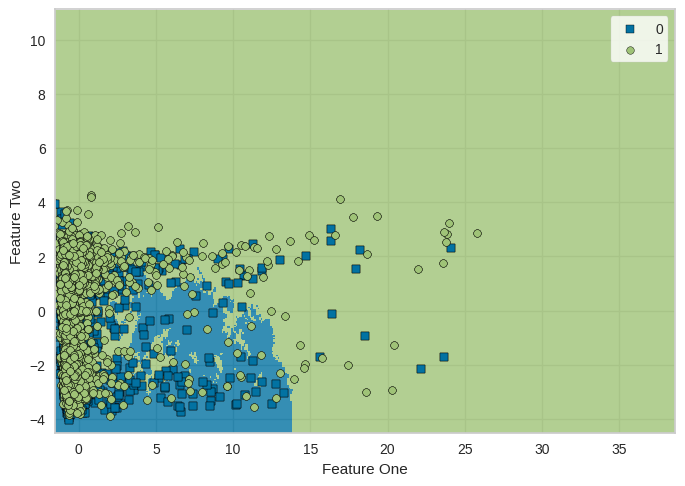

In [41]:
## Decision Boundary
plot_model(tuned_modelo, plot = 'boundary')

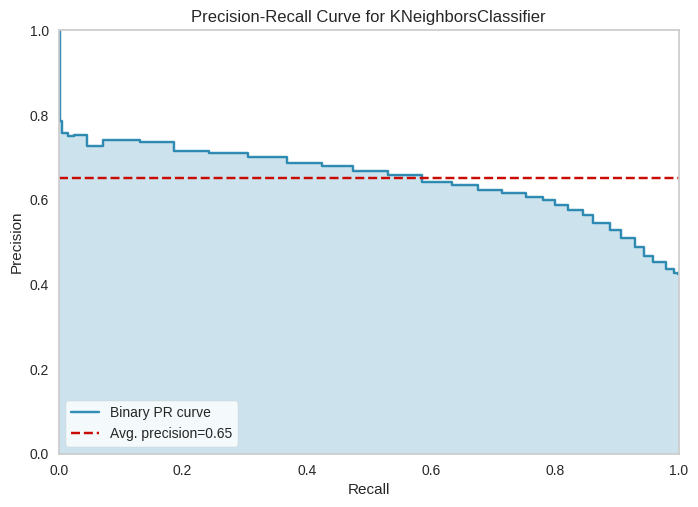

In [43]:
# Precision Recall Curve
plot_model(tuned_modelo, plot = 'pr')

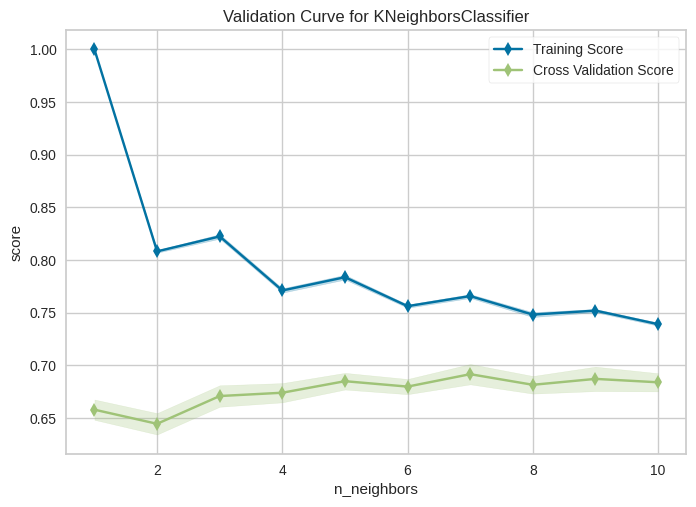

In [44]:
# Validation Curve
plot_model(tuned_modelo, plot = 'vc')

In [45]:
predicciones = predict_model(tuned_modelo,data=data_unusen)
predicciones.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.6744,0.7385,0.6834,0.6929,0.6881,0.3476,0.3476


,DocumentoCliente,MontoIngresos,Egresos,Pasivos,Origen Nacional,Departamento,Municipio,CodigoCIIU,MontoEntradasLarga,CantidadEntradasLarga,...,Deuda financiera-TodasObligFinanc,name1,name2,Pqrs,RiesgoCanal,Genero_estimado_1,Genero_estimado_2,Aperturo_2_productos,prediction_label,prediction_score
0,1016052113,7000000.0,6123000.0,101000.0,COLOMBIA,BOGOTA,BOGOTA D.C,10,0.0,0,...,101000.0,Daniel,Felipe,0,1,male,male,0,0,0.6000
1,1016052166,3000000.0,1456000.0,37452000.0,COLOMBIA,BOGOTA,BOGOTA D.C,99,0.0,5,...,37562000.0,Hernan,NaN,0,2,unknown,unknown,1,0,0.5143
2,1016052233,34750000.0,0.0,0.0,COLOMBIA,BOGOTA,BOGOTA D.C,99,6387835.5,5,...,NaN,Yeisson,Fernando,0,2,unknown,male,0,0,0.7143
3,1016052258,2500000.0,500000.0,0.0,COLOMBIA,BOGOTA,BOGOTA D.C,10,1463580.0,14,...,NaN,Inocencio,NaN,0,4,male,unknown,1,0,0.8286
4,1016052311,1740000.0,156000.0,2339000.0,COLOMBIA,CUNDINAMARCA,SOACHA,10,0.0,0,...,2339000.0,Cindy,Julieth,0,4,female,unknown,0,0,0.8000


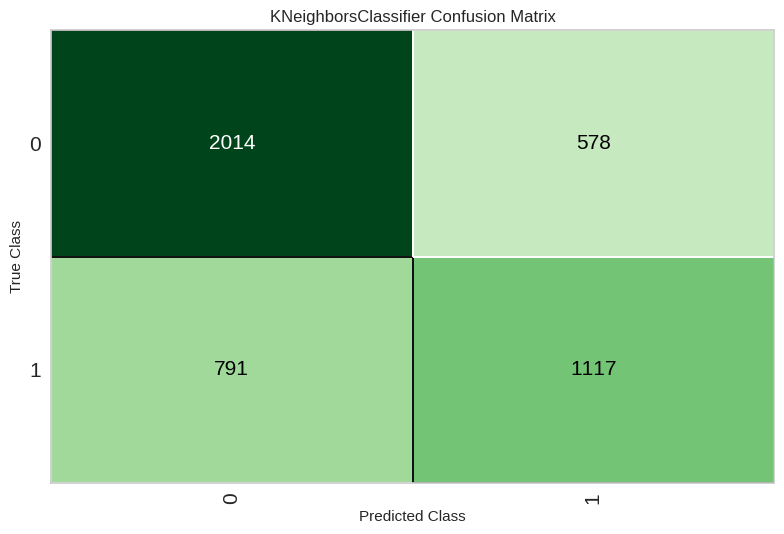

In [47]:
plot_model(tuned_modelo,'confusion_matrix')

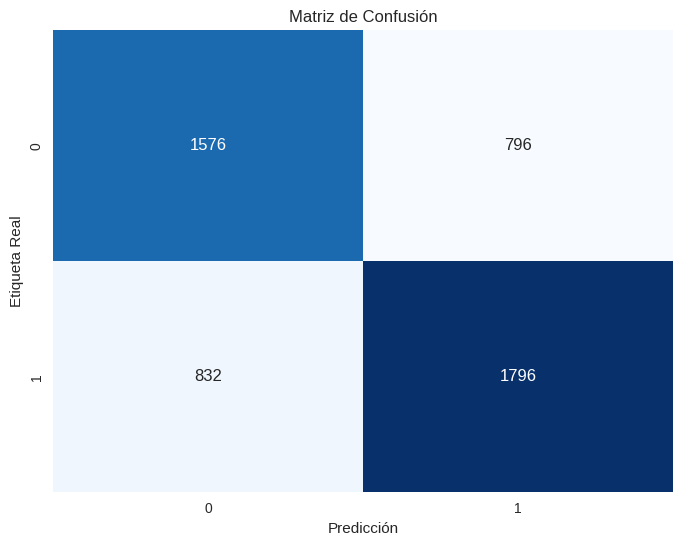

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las etiquetas reales y las predicciones
y_true = predicciones['Aperturo_2_productos']  # Reemplaza 'target_column_name' con el nombre de tu columna de etiquetas reales
y_pred = predicciones['prediction_label']  # 'Label' es la columna que contiene las predicciones del modelo

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()


In [49]:
# modelo final entrenado con todo el conjunto de datos

final_modelo=finalize_model(tuned_modelo)

In [50]:
# modelo final entrenado con todo el conjunto de datos

print(final_modelo)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['MontoIngresos', 'Egresos',
                                             'Pasivos', 'MontoEntradasLarga',
                                             'CantidadEntradasLarga',
                                             'MontoSalidasLarga',
                                             'CantidadSalidasLarga',
                                             'MontoEntradasCorta',
                                             'CantidadEntradasCorta',
                                             'MontoSalidasCorta',
                                             'CantidadSalidasCorta',
                                             'VulnerabilidadLavadoActivos',
                                             '...
                                                              min_samples_leaf=20,
                                    

In [ ]:
save_model(final_modelo,'ModeloProduccion')